# Tutorial 28 February 2024

## Personal networks, ego networks

#### We use the data collected by R. Vacca : the personal networks of 102 Sri Lankan immigrants living in Milan, Italy. The original data are available at: https://github.com/raffaelevacca/egocentric-r-book and a riche tutorial is available at: https://raffaelevacca.github.io/egocentric-r-book/

In [2]:
########### Preparation ##############
# import packages
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# use pandas to import list of egos with attributes
Egos = pd.read_csv('Ego.attr.csv', sep=';')
print(Egos)
# we focus on Ego n. 28 (the first in the list)

     ego_ID ego.sex  ego.age  ego.arr    ego.edu  ego.inc  empl ego.empl.bin  \
0        28    Male     61.0   2008.0  Secondary    350.0     3          Yes   
1        29    Male     38.0   2000.0    Primary    900.0     4          Yes   
2        33    Male     30.0   2010.0    Primary    200.0     3          Yes   
3        35    Male     25.0   2009.0  Secondary   1000.0     3          Yes   
4        39    Male     29.0   2007.0    Primary      0.0     1           No   
..      ...     ...      ...      ...        ...      ...   ...          ...   
97      160    Male     61.0   1993.0    Primary      0.0     2           No   
98      161    Male     34.0   2008.0    Primary    225.0     1           No   
99      162    Male     44.0   1992.0  Secondary   1100.0     4          Yes   
100     163    Male     50.0   2008.0    Primary    900.0     4          Yes   
101     164    Male     28.0   2008.0  Secondary   1500.0     4          Yes   

    ego.age.cat  
0           60+  
1  

In [4]:
# use pandas to import list of alters of Ego 28, with their attributes
Alters28 = pd.read_csv('Alter.attr.28.csv', sep=';')
Alters28

,alter_ID,ego_ID,alter_num,alter.sex,alter.age.cat,alter.rel,alter.nat,alter.res,alter.clo,alter.loan,alter.fam,alter.age
0,2801,28,1,Female,51-60,Close family,Sri Lanka,Sri Lanka,NaN,NaN,Yes,52
1,2802,28,2,Male,51-60,Other family,Sri Lanka,Sri Lanka,3.0,No,Yes,54
2,2803,28,3,Male,51-60,Close family,Sri Lanka,Sri Lanka,NaN,NaN,Yes,56
3,2804,28,4,Male,60+,Close family,Sri Lanka,Sri Lanka,NaN,NaN,Yes,63
4,2805,28,5,Female,41-50,Close family,Sri Lanka,Sri Lanka,NaN,NaN,Yes,47
5,2806,28,6,Female,60+,Close family,Sri Lanka,Sri Lanka,NaN,NaN,Yes,81
6,2807,28,7,Male,41-50,Other family,Sri Lanka,Sri Lanka,5.0,No,Yes,42
7,2808,28,8,Female,36-40,Other family,Sri Lanka,Sri Lanka,4.0,Yes,Yes,38
8,2809,28,9,Female,51-60,Other family,Sri Lanka,Sri Lanka,5.0,Yes,Yes,58
9,2810,28,10,Male,60+,Other family,Sri Lanka,Sri Lanka,5.0,No,Yes,68


In [5]:
# use pandas to import edgelist (of Ego 28) as a table
EgoEdges28 = pd.read_table('EgoNet.28.alone.csv', sep=';')
EgoEdges28

,V1,V2
0,2801,2802
1,2801,2803
2,2801,2804
3,2801,2805
4,2801,2806
...,...,...
254,2839,2845
255,2840,2841
256,2840,2844
257,2840,2845


In [6]:
# generate graph from pandas edgelist
# it is an undirected graph

EgoNet28 = nx.from_pandas_edgelist(EgoEdges28, 'V1', 'V2', create_using=nx.Graph()) 
print(EgoNet28)

Graph with 45 nodes and 259 edges


In [7]:
# match nodes of graph with attributes of nodes
NodeData = Alters28.set_index('alter_ID').to_dict('index').items()
EgoNet28.add_nodes_from(NodeData)

# view results
print(EgoNet28.nodes(data=True))

[(2801, {'ego_ID': 28, 'alter_num': 1, 'alter.sex': 'Female', 'alter.age.cat': '51-60', 'alter.rel': 'Close family', 'alter.nat': 'Sri Lanka', 'alter.res': 'Sri Lanka', 'alter.clo': nan, 'alter.loan': nan, 'alter.fam': 'Yes', 'alter.age': 52}), (2802, {'ego_ID': 28, 'alter_num': 2, 'alter.sex': 'Male', 'alter.age.cat': '51-60', 'alter.rel': 'Other family', 'alter.nat': 'Sri Lanka', 'alter.res': 'Sri Lanka', 'alter.clo': 3.0, 'alter.loan': 'No', 'alter.fam': 'Yes', 'alter.age': 54}), (2803, {'ego_ID': 28, 'alter_num': 3, 'alter.sex': 'Male', 'alter.age.cat': '51-60', 'alter.rel': 'Close family', 'alter.nat': 'Sri Lanka', 'alter.res': 'Sri Lanka', 'alter.clo': nan, 'alter.loan': nan, 'alter.fam': 'Yes', 'alter.age': 56}), (2804, {'ego_ID': 28, 'alter_num': 4, 'alter.sex': 'Male', 'alter.age.cat': '60+', 'alter.rel': 'Close family', 'alter.nat': 'Sri Lanka', 'alter.res': 'Sri Lanka', 'alter.clo': nan, 'alter.loan': nan, 'alter.fam': 'Yes', 'alter.age': 63}), (2805, {'ego_ID': 28, 'alter_n

In [8]:
# view edges
print(EgoNet28.edges(data=True))

[(2801, 2802, {}), (2801, 2803, {}), (2801, 2804, {}), (2801, 2805, {}), (2801, 2806, {}), (2801, 2807, {}), (2801, 2808, {}), (2801, 2809, {}), (2801, 2810, {}), (2801, 2811, {}), (2801, 2812, {}), (2801, 2813, {}), (2801, 2814, {}), (2801, 2815, {}), (2801, 2818, {}), (2801, 2820, {}), (2801, 2823, {}), (2801, 2825, {}), (2801, 2827, {}), (2801, 2828, {}), (2801, 2829, {}), (2801, 2831, {}), (2801, 2840, {}), (2801, 2841, {}), (2802, 2803, {}), (2802, 2804, {}), (2802, 2805, {}), (2802, 2806, {}), (2802, 2807, {}), (2802, 2808, {}), (2802, 2809, {}), (2802, 2810, {}), (2802, 2811, {}), (2802, 2812, {}), (2802, 2813, {}), (2802, 2815, {}), (2802, 2823, {}), (2802, 2831, {}), (2802, 2840, {}), (2802, 2841, {}), (2803, 2804, {}), (2803, 2805, {}), (2803, 2806, {}), (2803, 2807, {}), (2803, 2808, {}), (2803, 2809, {}), (2803, 2810, {}), (2803, 2811, {}), (2803, 2812, {}), (2803, 2840, {}), (2803, 2841, {}), (2804, 2805, {}), (2804, 2806, {}), (2804, 2807, {}), (2804, 2808, {}), (2804, 28

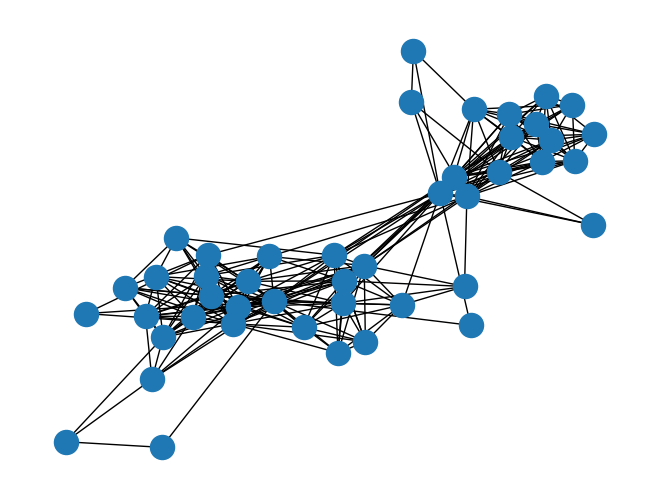

In [9]:
# Draw graph
nx.draw(EgoNet28)
plt.show()

## Personal network composition indicators

In [10]:
# Is the network of Ego 28 homogeneous by age?
# let's first look at the age of Ego 28 (the first in the table):
Egos['ego.age'].iloc[0]
# Ego turns out to be 61 yo

61.0

In [11]:
# Let's nos look at the age of alters
#For a numerical variable, like age, we can take mean, variance, stdev, quartiles, median...
print(Alters28['alter.age'].mean())
print(Alters28['alter.age'].var())
print(Alters28['alter.age'].std())
print(Alters28['alter.age'].quantile([0.25, 0.5, 0.75]))
# Ego 28's contacts are a bit younger, though with some variation

49.77777777777778
343.4949494949495
18.53361674080236
0.25    36.0
0.50    47.0
0.75    58.0
Name: alter.age, dtype: float64


In [12]:
# Is the network of Ego 28 homogeneous by gender?
# Let's first look at ego's gender:
Egos['ego.sex'].iloc[0]
# Ego turns out to be a man

'Male'

In [13]:
# Let's nos look at his alters
# For a binary variable like sex (well, at least in this case!),
# we can take proportion/percentage of women in network:
Alters28[['alter.sex']].value_counts(normalize=True)*100
# Ego 28, a man, is mostly surrounded by men

alter.sex
Male         82.222222
Female       17.777778
dtype: float64

#### Do the same for one of the other binary variables, for example alter.nat (country of birth/nationality), or alter.fam (whether alter is family member)


In [14]:
## Blau index (for a categorical variable with more than 2 categories)

# recall it is equal to 1 - p1^2 - p2^2 - ... - pk^2

# first create a function
def blau(df, col):
    return (1- ((df[col].value_counts() / df[col].count()) ** 2).sum())

# then apply it to the 'alters' table of ego 28, for example with attribute 'alter.age.cat' (= age category)
blau(Alters28, 'alter.age.cat')

0.8009876543209876

In [15]:
# Now, Index of Qualitative Variation
# which is a normalized version of Blau
# It is equal to Blau * k/(k-1), where k is the number of categories
# If you need to see how many/ which categories are represented in a categorical variables
print (Alters28['alter.age.cat'].unique())

['51-60' '60+' '41-50' '36-40' '18-25' '31-35' '26-30']


In [16]:
# There are 7 categories! 
# We can now calculate the IQV

blau(Alters28, 'alter.age.cat')*7/6

0.9344855967078188

In [ ]:
# Herfindahl-Hirschman index (HHI)
# equal to 1 - Blau

1 - blau(Alters28, 'alter.age.cat')

#### Exercise: calculate these indexes for one of the other categorical variables, for example alter.rel (= type of relationship) or alter.res (=country of residence)

## Structural measures

In [17]:
# find isolates (components consisting in 1 node)
list(nx.isolates(EgoNet28)) 

[]

In [18]:
# density
nx.density(EgoNet28) 

0.26161616161616164

In [ ]:
# Transitivity
print(nx.transitivity(EgoNet28)) 

In [ ]:
# Diameter
nx.diameter(EgoNet28)

In [ ]:
nx.average_shortest_path_length(EgoNet28)

In [ ]:
# degree contrality
nx.degree_centrality(EgoNet28)

##### In principle, all structural measures can be calculated on a personal / ego network. Just be aware of the relevance of each measure (par ex. reciprocity is not meaningful in un undirected graph, diameter cannot be computed in an unconnected graph, etc.).

## Exercise for next week

##### Describe the ego-network of another actor in the database and compare it to the ego-network of Ego 28. in particular, look at their age and year of arrival in destination country (Italy). Do the egos who have spent more time in Italy have more diverse networks (for example with fewer family members, or with more residents in Italy than in native Sri Lanka, or with more Italian-born contacts)? Are more diverse networks also less cohesive (lower density or transitivity, or higher APL, etc.)? 

# Solutions homework 28 February
## Personal networks, ego networks

#### Use R. Vacca's data on the personal networks of migrants from Sri Lanka living in Italy. Describe the ego-network of an actor in the database (not n. 28, which we examined together in class) and compare it to the ego-network of Ego 28. in particular, look at their age and year of arrival in destination country (Italy). Do the egos who have spent more time in Italy have more diverse networks (for example with fewer family members, or with more residents in Italy than in native Sri Lanka, or with more Italian-born contacts)? Are more diverse networks also less cohesive (lower density or transitivity, or higher APL, etc.)?

##### This is just an example of a possible solution, using the case of Ego 33. Other solutions are possible (also depending on the particular ego-network chosen).

In [ ]:
########### Preparation ##############
# import packages
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# use pandas to import list of egos with attributes
Egos = pd.read_csv('Ego.attr.csv', sep=';')
print(Egos)

     ego_ID ego.sex  ego.age  ego.arr    ego.edu  ego.inc  empl ego.empl.bin  \
0        28    Male     61.0   2008.0  Secondary    350.0     3          Yes   
1        29    Male     38.0   2000.0    Primary    900.0     4          Yes   
2        33    Male     30.0   2010.0    Primary    200.0     3          Yes   
3        35    Male     25.0   2009.0  Secondary   1000.0     3          Yes   
4        39    Male     29.0   2007.0    Primary      0.0     1           No   
..      ...     ...      ...      ...        ...      ...   ...          ...   
97      160    Male     61.0   1993.0    Primary      0.0     2           No   
98      161    Male     34.0   2008.0    Primary    225.0     1           No   
99      162    Male     44.0   1992.0  Secondary   1100.0     4          Yes   
100     163    Male     50.0   2008.0    Primary    900.0     4          Yes   
101     164    Male     28.0   2008.0  Secondary   1500.0     4          Yes   

    ego.age.cat  
0           60+  
1  

In [20]:
# use pandas to import list of alters (of all Egos), with their attributes
AltersAll = pd.read_csv('Alter.attr.all.csv', sep=';')
print(AltersAll)

      alter_ID  ego_ID  alter_num alter.sex alter.age.cat     alter.rel  \
0         2801      28          1    Female         51-60  Close family   
1         2802      28          2      Male         51-60  Other family   
2         2803      28          3      Male         51-60  Close family   
3         2804      28          4      Male           60+  Close family   
4         2805      28          5    Female         41-50  Close family   
...        ...     ...        ...       ...           ...           ...   
4585     16441     164         41      Male         31-35       Friends   
4586     16442     164         42    Female         26-30       Friends   
4587     16443     164         43      Male         36-40       Friends   
4588     16444     164         44      Male         31-35       Friends   
4589     16445     164         45      Male         36-40       Friends   

      alter.nat  alter.res  alter.clo alter.loan alter.fam  alter.age  
0     Sri Lanka  Sri Lanka 

## Personal network composition indicators

In [21]:
# Is the network of Ego homogeneous by age?
# let's first look at the age of Ego
# for example, Ego n. 33

# 1st method: if I know the index of Ego 33 (here = 2), then I can use:
Egos['ego.age'].iloc[2]


30.0

In [22]:
# 2nd method: I can use the ego_ID variable (here, = 33) to find the cell I am looking for
Egos.loc[Egos['ego_ID'] == 33, 'ego.age']

2    30.0
Name: ego.age, dtype: float64

In [23]:
# What is the average age of the alters of Ego n. 33?
AltersAll.loc[AltersAll['ego_ID'] == 33, 'alter.age'].mean()

37.577777777777776

In [ ]:
# same for variance
AltersAll.loc[AltersAll['ego_ID'] == 33, 'alter.age'].var()

116.74949494949496

In [ ]:
# same for quantiles
AltersAll.loc[AltersAll['ego_ID'] == 33, 'alter.age'].quantile([0.25, 0.5, 0.75])

0.25    29.0
0.50    34.0
0.75    47.0
Name: alter.age, dtype: float64

##### We can conclude that the personal network of Ego 33 includes people who are, on average, rather close to Egos' age (only slightly older).

In [24]:
# OPTION: generalize this analysis to all Egos
# Do people surround themselves with contacts of similar age?

# To answer, we must first calculate the average age of the alters of each ego
# one way is to use "groupby" function in pandas
AlterAgeMean = AltersAll.groupby('ego_ID')['alter.age'].mean() # this generates the mean of alters' age for each ego
AlterAgeMean = AlterAgeMean.reset_index() # this is just to ensure that output is a pandas dataframe
AlterAgeMean # show result

,ego_ID,alter.age
0,28,49.777778
1,29,42.400000
2,33,37.577778
3,35,36.177778
4,39,39.822222
...,...,...
97,160,52.977778
98,161,37.777778
99,162,48.111111
100,163,46.088889


In [28]:
# OPTION (CONT.): To compare the age of ego to the average age of his/her alters, for all egos,
# we can put together a new file with ego's age and the average age of his/her alters
frames = [Egos['ego.age'], AlterAgeMean] # select the objects we want fropm two different dataframes
Age = pd.concat(frames, axis=1) # Merges multiple dataFrame objects
Age # view result

,ego.age,ego_ID,alter.age
0,61.0,28,49.777778
1,38.0,29,42.400000
2,30.0,33,37.577778
3,25.0,35,36.177778
4,29.0,39,39.822222
...,...,...,...
97,61.0,160,52.977778
98,34.0,161,37.777778
99,44.0,162,48.111111
100,50.0,163,46.088889


In [ ]:
# OPTION (CONT.) We can now look at the difference between ego's age and the average age of his/her alters
Age['age.diff'] = Age['ego.age'] - Age['alter.age'] # create a new column with this value
print(Age['age.diff'].mean()) # show mean of the difference
print(Age['age.diff'].var()) # show variance
# this helps to see whether overall, these ego networks are homogenous with respect to age

-0.7640164016401647
54.240349226639864


##### We can conclude that the Egos in this dataset have alters of similar age on average. 

In [ ]:
# Let's now look at a binary variable, for ex. gender
# Is the network of Ego 33 homogeneous by gender?
# Let's first look at the gender of Ego 33:
Egos['ego.sex'].iloc[2]

'Male'

In [ ]:
# Let's look at the gender of his alters
AltersAll.loc[AltersAll['ego_ID'] == 33, 'alter.sex'].value_counts(normalize=True)

alter.sex
Male      0.622222
Female    0.377778
Name: proportion, dtype: float64

In [ ]:
# OPTION: generalize this analysis to all Egos
# Do people surround themselves with contacts of similar sex?

# First, what is the sex of Egos?
Egos['ego.sex'].value_counts(normalize=True)

ego.sex
Male    1.0
Name: proportion, dtype: float64

In [ ]:
# OPTION (CONT.): 
# Egos are all men!
# We must now look at the proportions of women and men from among the alters of each ego
# one way is to use "groupby" function in pandas (as above)
AlterSexProp = AltersAll.groupby('ego_ID')['alter.sex'].value_counts(normalize=True) # this generates the proportions for each ego
AlterSexProp = AlterSexProp.reset_index() # this is just to ensure that output is a pandas dataframe
AlterSexProp # show result

,ego_ID,alter.sex,proportion
0,28,Male,0.822222
1,28,Female,0.177778
2,29,Male,0.911111
3,29,Female,0.088889
4,33,Male,0.622222
...,...,...,...
199,162,Female,0.288889
200,163,Male,0.666667
201,163,Female,0.333333
202,164,Male,0.688889


In [ ]:
# OPTION (CONT.): What is, on average, the proportion of men among the alters of each ego?
AlterSexProp.loc[AlterSexProp['alter.sex'] == 'Male', 'proportion'].mean()

0.717429193899782

##### So, all egos are men and on average, slightly over 70% of their alters are also men. These are very homogeneous (with respect to this variable) personal networks. It may be a result of the specific situation of these people (migrants).
##### One could do further analyses, not shown here, to better understand this result: for example, are the female alters also family members? Are they mostly based in the destination country (Italy) or in the origin country (Sri Lanka)?

In [25]:
# Let's now look at the case of categorical variables with more than 2 categories, 
# for ex. type of alter relationships

# First, define a function that calculate the Blau index
def blau(df,col):
    return(1 - ((df[col].value_counts() / df[col].count())**2).sum())

# then apply the function to the case of Ego 33
blau(AltersAll.loc[AltersAll['ego_ID'] == 33], 'alter.rel')

0.7022222222222223

In [26]:
# What are the existing categories?
AltersAll['alter.rel'].unique()

array(['Close family', 'Other family', 'Friends', 'Acquaintances'],
      dtype=object)

In [27]:
# IQV is normalized Blau
blau(AltersAll.loc[AltersAll['ego_ID'] == 33], 'alter.rel')*4/3

0.9362962962962964

## Structure

In [32]:
# use pandas to import edgelist (of Ego 33) as a table
EgoEdges33 = pd.read_table('EgoNets_All\EgoNet.33.csv', sep=',')
EgoEdges33 = EgoEdges33[['V1','V2']] # selects relevant columns (removing an unnecessary index column)
EgoEdges33 # view result

,V1,V2
0,3301,3302
1,3301,3303
2,3301,3304
3,3301,3305
4,3301,3306
...,...,...
202,3339,3340
203,3339,3345
204,3340,3345
205,3341,3342


In [33]:
# generate graph from pandas edgelist
# it is an undirected graph

EgoNet33 = nx.from_pandas_edgelist(EgoEdges33, 'V1', 'V2', create_using=nx.Graph()) 
print(EgoNet33)

Graph with 44 nodes and 207 edges


In [34]:
# match nodes of graph with attributes of nodes
Alters33 = AltersAll.loc[AltersAll['ego_ID'] == 33] # select only the alters if Ego 33
NodeData33 = Alters33.set_index('alter_ID').to_dict('index').items() # Dictionary format
EgoNet33.add_nodes_from(NodeData33) # add attributes to graph

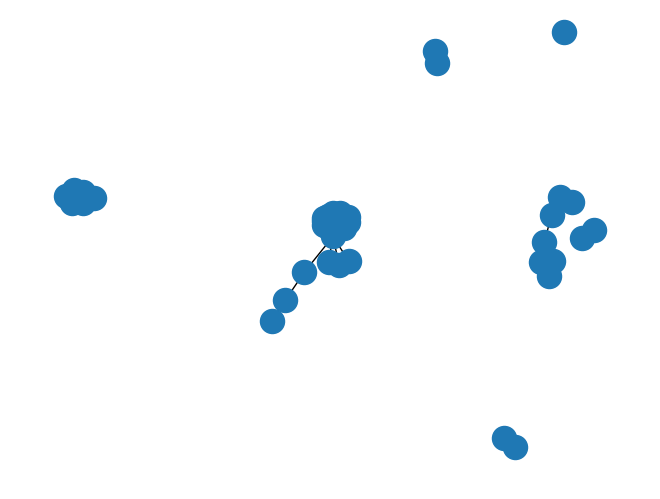

In [35]:
# Draw graph
nx.draw(EgoNet33)
plt.show()
# here, visualisation serves to support reasoning - I am not trying to make it beautiful (use Gephi for that)

In [36]:
# There seem to be isolates 
list(nx.isolates(EgoNet33))

[3333]

In [37]:
# and very small components
nx.number_connected_components(EgoNet33)

7

In [38]:
# Which are these components?
list(nx.connected_components(EgoNet33))

[{3301,
  3302,
  3303,
  3304,
  3305,
  3306,
  3307,
  3308,
  3309,
  3310,
  3311,
  3312,
  3313,
  3314,
  3315,
  3316,
  3317,
  3318,
  3319,
  3320,
  3321,
  3322,
  3323,
  3324,
  3325},
 {3326, 3327, 3328, 3329, 3330, 3331, 3332},
 {3334, 3335},
 {3336, 3337, 3338, 3339, 3340, 3345},
 {3341, 3342},
 {3343, 3344},
 {3333}]

In [39]:
# Are those in smaller components residents of the destination country (Italy)?
residence = nx.get_node_attributes(EgoNet33,'alter.res')
# to view the value for the isolate node (n. 3333)
print(residence[3333])
# and for those in small components
print(residence[3343])
print(residence[3344])
print(residence[3342])
print(residence[3341])
print(residence[3334])
print(residence[3335])

Italy
Italy
Italy
Italy
Italy
Italy
Italy


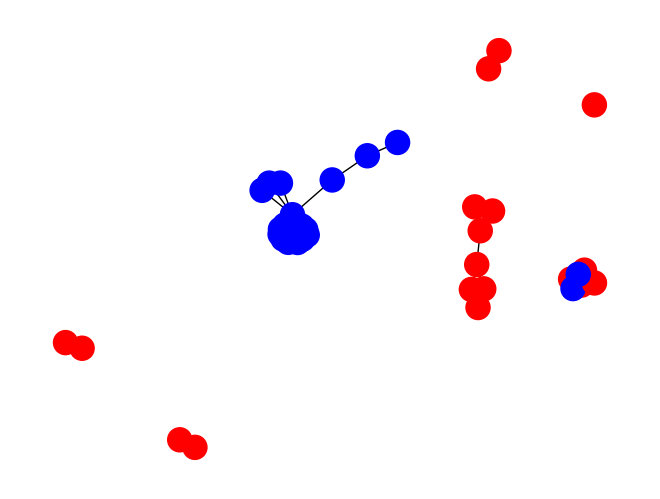

In [40]:
# It seems that the least connected alters live in the destination country
# How general is this?

# OPTION: see this visually

# create empty list for node colors
node_color = []

# for each alter in the ego net of n. 33
for node in EgoNet33.nodes(data=True):

    # if the node lives in Sri Lanka
    if node[1]['alter.res']=='Sri Lanka':
        node_color.append('blue')
        
    # if the node lives in Italy
    elif node[1]['alter.res']=='Italy':
        node_color.append('red')

    # if the node lives elsewhere
    elif node[1]['alter.res']=='Other':
        node_color.append('black')

# draw graph with node attribute color
nx.draw(EgoNet33, node_color=node_color)

# again, visualisation serves to support reasoning - I am not trying to make it beautiful (use Gephi for that)

In [ ]:
# The result is a very sparse and rather diverse network, with alters both in Sri Lanka and Italy.
# Ego n. 33 arrived in Italy only 2 years before data collection (which was in 2012):
Egos['ego.arr'].iloc[2]

2010.0

##### Last week, we examined the network of Ego 28 who had arrived in Italy earlier, and therefore had more time to adjust his relationships. Compared to 33, the network of 28 was much denser (it formed a single connected component).

##### Because this particular ego-network consists of several components, and it is of small size, some measures cannot be calculated (for ex. diameter) while others are not very interesting because values will be very low (for ex. clustering coefficient). For this reason, I focused here on components. You should consider the characteristics of the Ego network you are examining before deciding which structural measures to compute. 